# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# load the breast cancer dataset
cancer = load_breast_cancer()

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df['target'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
df[df['target']==0].count()

mean radius                212
mean texture               212
mean perimeter             212
mean area                  212
mean smoothness            212
mean compactness           212
mean concavity             212
mean concave points        212
mean symmetry              212
mean fractal dimension     212
radius error               212
texture error              212
perimeter error            212
area error                 212
smoothness error           212
compactness error          212
concavity error            212
concave points error       212
symmetry error             212
fractal dimension error    212
worst radius               212
worst texture              212
worst perimeter            212
worst area                 212
worst smoothness           212
worst compactness          212
worst concavity            212
worst concave points       212
worst symmetry             212
worst fractal dimension    212
target                     212
dtype: int64

In [8]:
X = df.drop(['target'],axis=1)
y= df['target']

In [9]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [11]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
clf = LogisticRegression()
# clf = LogisticRegression(max_iter=4000)


In [16]:
clf.fit(X_train,y_train)

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# clf= LogisticRegression(solver='lbfgs', max_iter=3500)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [20]:
clf.score(X_test,y_test)

0.956140350877193

In [21]:
from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test, y_pred)

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

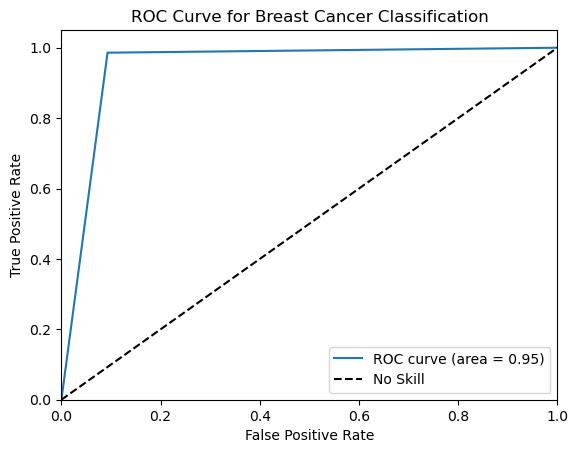

In [23]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

In [24]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [25]:
# let's try by selecting only some of the features and how they react 

In [26]:
df1 = df[['mean fractal dimension','worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity','target']]

In [27]:
df2 = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error','target']]

In [28]:
df1.head(3)

,mean fractal dimension,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,target
0,0.07871,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0
1,0.05667,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0
2,0.05999,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0


In [29]:
df2.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0


In [30]:
X = df1.drop(['target'],axis=1)
y= df1['target']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(max_iter=3000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
clf.score(X_test,y_test)

0.9210526315789473

In [34]:
X = df2.drop(['target'],axis=1)
y= df2['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8947368421052632

In [35]:
# for imbalanced dataset precision, recall, F1-score, or AUC-ROC should also be considered.

# Kmeans

##### import necessary packages

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np

##### import dataset

In [37]:
df=pd.read_csv("marketing.csv")

In [38]:
df.head()

,Unnamed: 0,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Living_With,Children,Family_Size,Is_Parent
0,0,Graduate,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,4706,67,Alone,0,1,0
1,1,Graduate,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,3971,70,Alone,2,3,1
2,2,Graduate,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,4323,59,Partner,0,2,0
3,3,Graduate,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,3969,40,Partner,1,3,1
4,4,Postgraduate,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,3960,43,Partner,1,3,1


In [39]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [40]:
df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,4706,67,Alone,0,1,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,3971,70,Alone,2,3,1
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,4323,59,Partner,0,2,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,3969,40,Partner,1,3,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,3960,43,Partner,1,3,1


 ##### analyzing columns

In [41]:

# for i in df.columns:
#     print(f"unique value of {i}:{df[i].unique()}")
    
#     print("...........")


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   Wines                2240 non-null   int64  
 4   Fruits               2240 non-null   int64  
 5   Meat                 2240 non-null   int64  
 6   Fish                 2240 non-null   int64  
 7   Sweets               2240 non-null   int64  
 8   Gold                 2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  NumWebVisitsMonth    2240 non-null   int64  
 14  joined_days          2240 non-null   int64  
 15  Age                  2240 non-null   i

##### Introduction to Labelencoder and one hot encoding

###### education is ordinal(hierarchy on PHD masters etc) data hence we prefer label encoding

In [43]:
df['Education'].unique()  # Before using the label encoder 

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [44]:
df_new=df
label_encoder = LabelEncoder()
df_new['Education'] = label_encoder.fit_transform(df_new['Education'])

In [45]:
df['Education'].unique()  # label encoder effect

array([0, 1, 2])

In [46]:
df_new

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,4706,67,Alone,0,1,0
1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,3971,70,Alone,2,3,1
2,0,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,4323,59,Partner,0,2,0
3,0,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,3969,40,Partner,1,3,1
4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,3960,43,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,4331,57,Partner,1,3,1
2236,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,3969,78,Partner,3,5,1
2237,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,3954,43,Alone,0,1,0
2238,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,3955,68,Partner,1,3,1


###### living with is nominal data (Categorical)hence we prefer get_dummies

In [47]:
df_new = pd.get_dummies(df_new, columns=['Living_With'], drop_first=False)

In [48]:
df_new

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
0,0,58138.0,58,635,88,546,172,88,88,3,...,10,4,7,4706,67,0,1,0,True,False
1,0,46344.0,38,11,1,6,2,1,6,2,...,1,2,5,3971,70,2,3,1,True,False
2,0,71613.0,26,426,49,127,111,21,42,1,...,2,10,4,4323,59,0,2,0,False,True
3,0,26646.0,26,11,4,20,10,3,5,2,...,0,4,6,3969,40,1,3,1,False,True
4,1,58293.0,94,173,43,118,46,27,15,5,...,3,6,5,3960,43,1,3,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,...,3,4,5,4331,57,1,3,1,False,True
2236,1,64014.0,56,406,0,30,0,0,8,7,...,2,5,7,3969,78,3,5,1,False,True
2237,0,56981.0,91,908,48,217,32,12,24,1,...,3,13,6,3954,43,0,1,0,True,False
2238,1,69245.0,8,428,30,214,80,30,61,2,...,5,10,3,3955,68,1,3,1,False,True


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int32  
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   Wines                2240 non-null   int64  
 4   Fruits               2240 non-null   int64  
 5   Meat                 2240 non-null   int64  
 6   Fish                 2240 non-null   int64  
 7   Sweets               2240 non-null   int64  
 8   Gold                 2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  NumWebVisitsMonth    2240 non-null   int64  
 14  joined_days          2240 non-null   int64  
 15  Age                  2240 non-null   i

In [50]:
#  Living_With has been handled as boolean but still it acts as an object. so we change it to int

In [51]:
df_new['Living_With_Partner'] = df_new['Living_With_Partner'].astype(int)
df_new['Living_With_Alone'] = df_new['Living_With_Alone'].astype(int)


In [52]:
df_new

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
0,0,58138.0,58,635,88,546,172,88,88,3,...,10,4,7,4706,67,0,1,0,1,0
1,0,46344.0,38,11,1,6,2,1,6,2,...,1,2,5,3971,70,2,3,1,1,0
2,0,71613.0,26,426,49,127,111,21,42,1,...,2,10,4,4323,59,0,2,0,0,1
3,0,26646.0,26,11,4,20,10,3,5,2,...,0,4,6,3969,40,1,3,1,0,1
4,1,58293.0,94,173,43,118,46,27,15,5,...,3,6,5,3960,43,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,...,3,4,5,4331,57,1,3,1,0,1
2236,1,64014.0,56,406,0,30,0,0,8,7,...,2,5,7,3969,78,3,5,1,0,1
2237,0,56981.0,91,908,48,217,32,12,24,1,...,3,13,6,3954,43,0,1,0,1,0
2238,1,69245.0,8,428,30,214,80,30,61,2,...,5,10,3,3955,68,1,3,1,0,1


In [53]:
df_new.shape

(2240, 21)

##### model definition and fitting 

In [54]:
# let's test with number of clusters = 3

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_new['Cluster'] = kmeans.fit_predict(df_new)
# adding new column 'Cluster'in the data frame represeting cluster category of each data point

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
df_new

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner,Cluster
0,0,58138.0,58,635,88,546,172,88,88,3,...,4,7,4706,67,0,1,0,1,0,0
1,0,46344.0,38,11,1,6,2,1,6,2,...,2,5,3971,70,2,3,1,1,0,1
2,0,71613.0,26,426,49,127,111,21,42,1,...,10,4,4323,59,0,2,0,0,1,0
3,0,26646.0,26,11,4,20,10,3,5,2,...,4,6,3969,40,1,3,1,0,1,1
4,1,58293.0,94,173,43,118,46,27,15,5,...,6,5,3960,43,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,...,4,5,4331,57,1,3,1,0,1,0
2236,1,64014.0,56,406,0,30,0,0,8,7,...,5,7,3969,78,3,5,1,0,1,0
2237,0,56981.0,91,908,48,217,32,12,24,1,...,13,6,3954,43,0,1,0,1,0,0
2238,1,69245.0,8,428,30,214,80,30,61,2,...,10,3,3955,68,1,3,1,0,1,0


In [57]:
# number of clusters = 3 was used for demo purpose
# let's optimize by value of clusters (k)

In [58]:
X=df_new.drop(columns='Cluster',axis=1)
X

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
0,0,58138.0,58,635,88,546,172,88,88,3,...,10,4,7,4706,67,0,1,0,1,0
1,0,46344.0,38,11,1,6,2,1,6,2,...,1,2,5,3971,70,2,3,1,1,0
2,0,71613.0,26,426,49,127,111,21,42,1,...,2,10,4,4323,59,0,2,0,0,1
3,0,26646.0,26,11,4,20,10,3,5,2,...,0,4,6,3969,40,1,3,1,0,1
4,1,58293.0,94,173,43,118,46,27,15,5,...,3,6,5,3960,43,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,...,3,4,5,4331,57,1,3,1,0,1
2236,1,64014.0,56,406,0,30,0,0,8,7,...,2,5,7,3969,78,3,5,1,0,1
2237,0,56981.0,91,908,48,217,32,12,24,1,...,3,13,6,3954,43,0,1,0,1,0
2238,1,69245.0,8,428,30,214,80,30,61,2,...,5,10,3,3955,68,1,3,1,0,1


In [59]:
from sklearn.metrics import silhouette_score

# clusters = y_kmeans
silhouette_avg = silhouette_score(X, df_new['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.596772865454558


In [60]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(X,df_new['Cluster'])
dbi_score

0.3612133665307385

In [61]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [62]:
wcss

[1404140195268.7766,
 681876529956.7097,
 326813522482.87616,
 183359436390.5712,
 124624480074.27989,
 82665065974.28644,
 53710166311.196556,
 40917777370.14438,
 31272810115.59114,
 24424329089.25099]

##### choosing best cluster from analysis using elbow method

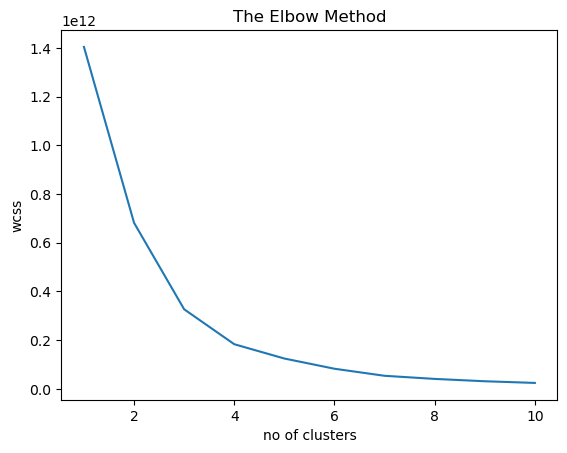

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [64]:
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans=kmeansmodel.fit(X)
y_pred = y_kmeans.predict(X)
print(np.unique(kmeansmodel.labels_))

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 2 3]


In [65]:
from sklearn.metrics import silhouette_score

# clusters = y_kmeans
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5436211754391522


##### mean analysis to intrepret the cluster 

In [69]:
cluster_means = df_new.groupby('Cluster').mean()

In [70]:
cluster_means

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.562500,70414.500933,48.93097,544.194963,46.817164,305.879664,65.724813,47.747201,66.066231,2.228545,...,4.597015,8.071828,3.899254,4318.801306,57.416978,0.691231,2.347015,0.556903,0.344216,0.655784
1,0.657241,35032.418194,49.29563,83.487575,7.467866,39.457584,11.646958,8.084833,23.799486,2.412168,...,0.886033,3.696658,6.617823,4317.850900,53.159383,1.188518,2.822622,0.860326,0.365895,0.634105
2,0.000000,666666.000000,23.00000,9.000000,14.000000,18.000000,8.000000,1.000000,12.000000,4.000000,...,1.000000,3.000000,6.000000,4342.000000,47.000000,1.000000,3.000000,1.000000,0.000000,1.000000


In [68]:
kmeansmodel = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_kmeans=kmeansmodel.fit(X)

print(np.unique(kmeansmodel.labels_))
from sklearn.metrics import silhouette_score

# clusters = y_kmeans
silhouette_avg = silhouette_score(X, df_new['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

c:\Users\Ayush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1]
Silhouette Score: 0.596772865454558
